# 作業目標:¶
利用手寫辨識資料說明MLP 中, 神經網路層的多寡跟預測結果的差異

# 作業重點:
[練習]請嘗試新增一層或兩層看看最後預測結果是否有差異
model.add(Dense(units=256, input_dim=784, kernel_initializer='normal', activation='relu'))


# 資料預處理

In [1]:
from keras.utils import np_utils
import numpy as np
np.random.seed(10)

Using TensorFlow backend.
C:\Users\Sean\Anaconda3\envs\tensorflow-gpu\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\Sean\Anaconda3\envs\tensorflow-gpu\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\Sean\Anaconda3\envs\tensorflow-gpu\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\Sean\Anaconda3

In [2]:
#載入手寫辨識的資料集
from keras.datasets import mnist
(x_train_image,y_train_label),\
(x_test_image,y_test_label)= mnist.load_data()

In [3]:
#指定測試集與訓練資料集
x_Train =x_train_image.reshape(60000, 784).astype('float32')
x_Test = x_test_image.reshape(10000, 784).astype('float32')

In [4]:
# normalize inputs from 0-255 to 0-1
x_Train_normalize = x_Train / 255
x_Test_normalize = x_Test / 255

In [5]:
#把LABEL轉成NUMERICAL Categorical 
y_Train_OneHot = np_utils.to_categorical(y_train_label)
y_Test_OneHot = np_utils.to_categorical(y_test_label)

# 建立模型

In [6]:
from keras.models import Sequential
from keras.layers import Dense
from keras import layers

In [7]:
#建立模型
model = Sequential()

In [8]:
model.add(layers.Dense(256,activation='relu',input_shape=(784,)))
model.add(layers.Dense(128,activation='relu'))
model.add(layers.Dense(10,activation='softmax'))

# 訓練模型

In [9]:
model.compile(loss='categorical_crossentropy', 
              optimizer='adam', metrics=['accuracy'])

In [10]:
train_history = model.fit(
    x=x_Train_normalize,
    y=y_Train_OneHot,
    validation_split=0.2, 
    epochs=10,
    batch_size=32,
    verbose=1
)


Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 7s 141us/step - loss: 0.2318 - accuracy: 0.9313 - val_loss: 0.1080 - val_accuracy: 0.9679
Epoch 2/10
48000/48000 [==============================] - 7s 142us/step - loss: 0.0921 - accuracy: 0.9725 - val_loss: 0.0933 - val_accuracy: 0.9712
Epoch 3/10
48000/48000 [==============================] - 6s 131us/step - loss: 0.0613 - accuracy: 0.9800 - val_loss: 0.0948 - val_accuracy: 0.9732
Epoch 4/10
48000/48000 [==============================] - 6s 133us/step - loss: 0.0463 - accuracy: 0.9850 - val_loss: 0.0858 - val_accuracy: 0.9755
Epoch 5/10
48000/48000 [==============================] - 6s 130us/step - loss: 0.0350 - accuracy: 0.9883 - val_loss: 0.0811 - val_accuracy: 0.9764
Epoch 6/10
48000/48000 [==============================] - 6s 131us/step - loss: 0.0269 - accuracy: 0.9911 - val_loss: 0.0855 - val_accuracy: 0.9767
Epoch 7/10
48000/48000 [==============================] - 6s 

# 以圖形顯示訓練過程

In [11]:
import matplotlib.pyplot as plt
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

In [12]:
show_train_history(train_history,'acc','val_acc')

KeyError: 'acc'

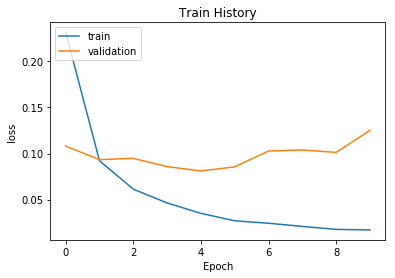

In [13]:
show_train_history(train_history,'loss','val_loss')

# 評估模型準確率

In [14]:
scores = model.evaluate(x_Test_normalize, y_Test_OneHot)
print()
print('accuracy=',scores[1])

10000/10000 [==============================] - 0s 49us/step

accuracy= 0.9768000245094299
